In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_location = "/Users/jiach/Documents/python3/"
file_name = "orders_new.csv"

my_data = pd.read_csv(file_location + file_name)

In [31]:
my_data.tail()

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
39953,US,2017-04-04,12624549,9305375196309306561,9.99,4489579059658865688,ANDROID_APPS
39954,US,2017-04-01,12624548,10864021731086048938,9.99,12984055359496400963,ANDROID_APPS
39955,US,2017-04-07,12624548,11896472227391290390,9.99,12984055359496400963,ANDROID_APPS
39956,US,2017-04-04,12624548,12777924912899351064,9.99,12984055359496400963,ANDROID_APPS
39957,US,2017-04-03,12624548,3178547077051994619,14.99,2697241628661480461,MUSIC


In [21]:
def GetSeries(my_data, my_id):
    table = my_data[["date", "spend_usd"]][my_data.experiment_id == my_id]
    series = table.groupby('date')['spend_usd'].sum()
    return(series)

In [63]:
def PlotSeries(index_series, experiment_series, control_series):
    df = pd.DataFrame(
        {
            "experiment": experiment_series.tolist(),
            "control": control_series.tolist()
        },
        index = index_series.tolist(), 
        columns = ["experiment", "control"]
    )
    df.plot(rot=45)

In [64]:
def PrintCumulativeTS(my_data, country, experiment_ids):
    date_series = my_data.date
    index_series = np.unique(date_series) 
    index_series = np.sort(index_series)
    
    my_data=my_data[["date", "experiment_id","spend_usd"]][(my_data.country=='country')]

    my_data= my_data.sort_values("date", ascending=True, inplace=False)

    treatment_cum = np.cumsum(GetSeries(my_data1, experiment_ids[0]))
    control_cum = np.cumsum(GetSeries(my_data1, experiment_ids[1]))
    a = pd.concat([treatment_cum, control_cum], axis=1)
    
    PlotSeries(index_series, treatment_cum, control_cum)
    
    chart = pd.concat([treatment_cum, control_cum], axis=1)
    chart.columns=['treatment_cum_spend','control_cum_spend']
    chart['cum% uplift on revenue']=(chart.iloc[:,1]-chart.iloc[:,0])/chart.iloc[:,0]
    return(chart)
                           
                           

,treatment_cum_spend,control_cum_spend,cum% uplift on revenue
date,,,
2017-04-01,19161.677584,20041.695113,0.045926
2017-04-02,35212.357584,36562.637889,0.038347
2017-04-03,49546.127584,51008.836778,0.029522
2017-04-04,63626.336693,65581.939723,0.030736
2017-04-05,77762.714860,81581.481912,0.049108
2017-04-06,94620.114860,100399.482837,0.061080
2017-04-07,114451.306257,119801.407316,0.046746


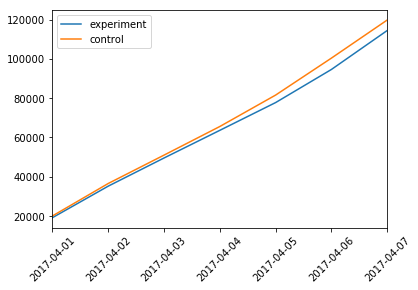

In [65]:
PrintCumulativeTS(my_data, 'JP', [12624548, 12624549])

,treatment_cum_spend,control_cum_spend,cum% uplift on revenue
date,,,
2017-04-01,19161.677584,20041.695113,0.045926
2017-04-02,35212.357584,36562.637889,0.038347
2017-04-03,49546.127584,51008.836778,0.029522
2017-04-04,63626.336693,65581.939723,0.030736
2017-04-05,77762.714860,81581.481912,0.049108
2017-04-06,94620.114860,100399.482837,0.061080
2017-04-07,114451.306257,119801.407316,0.046746


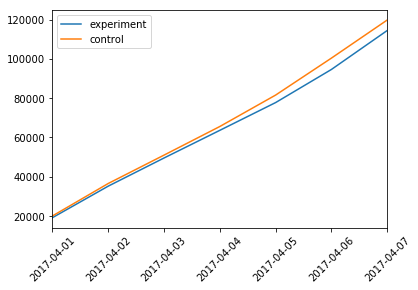

In [66]:
PrintCumulativeTS(my_data, 'US', [12624548, 12624549])